In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


/usr/local/lib/python3.12/dist-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
data = pd.read_csv('/home/ichigo/Desktop/Medical diagnosis uisng AI/Diseases_dataset/diabetes.csv')

In [3]:
# Replace 0s with NaN for specific columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)


In [4]:
# Impute missing values with median
data.fillna(data.median(), inplace=True)

In [5]:
# Features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Save the scaler for Streamlit use
import pickle
with open('diabetes_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

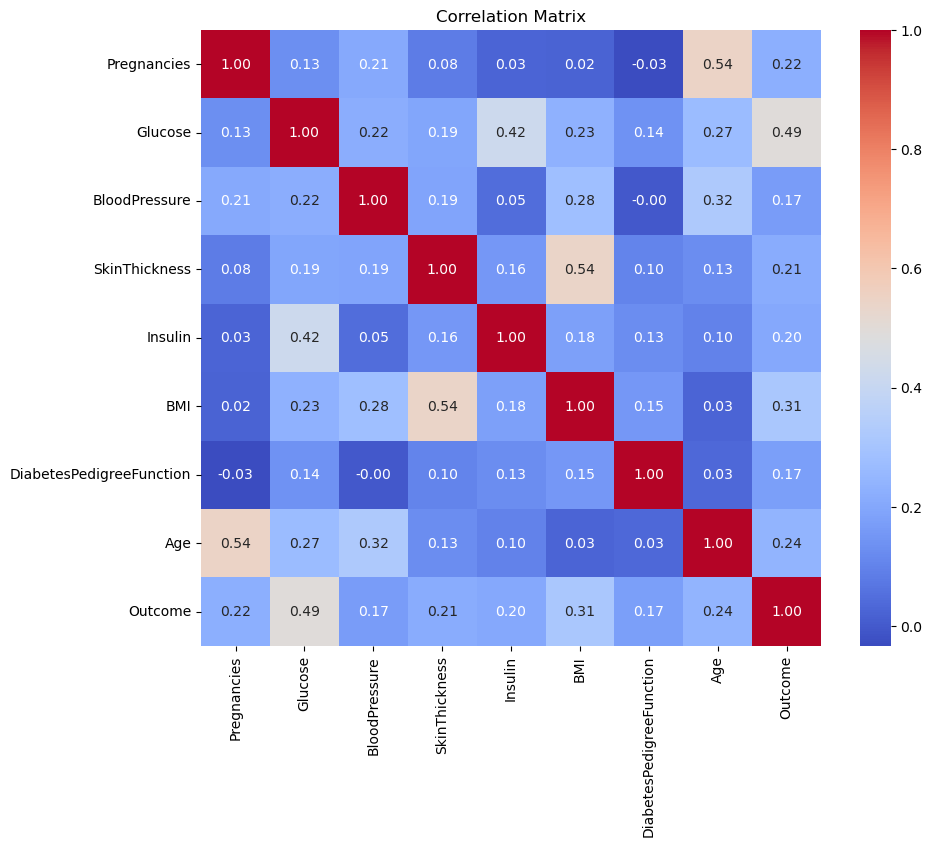

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

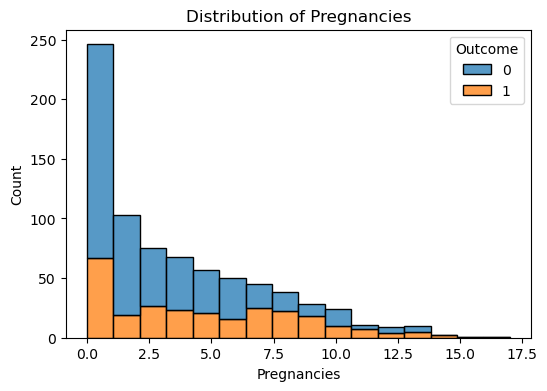

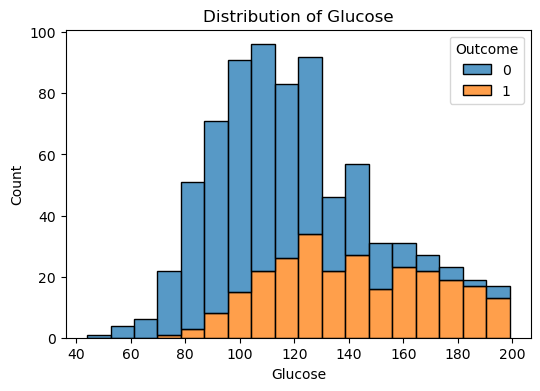

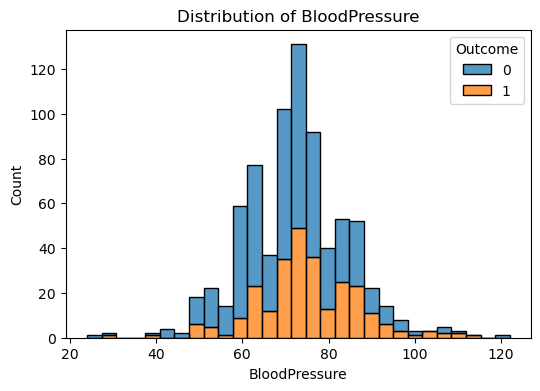

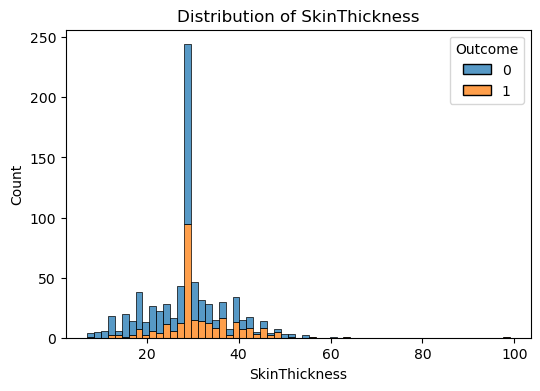

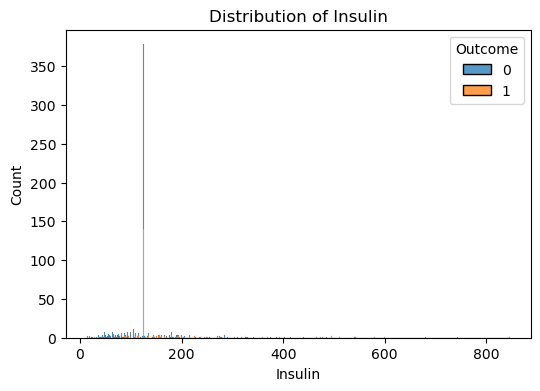

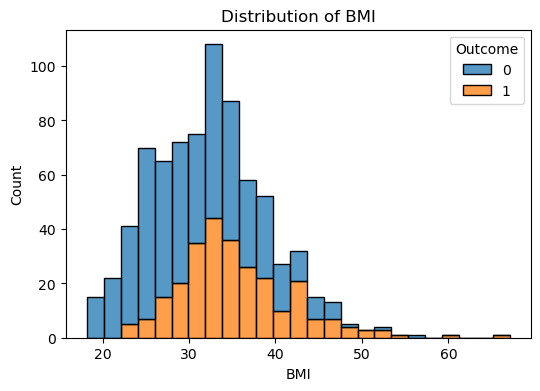

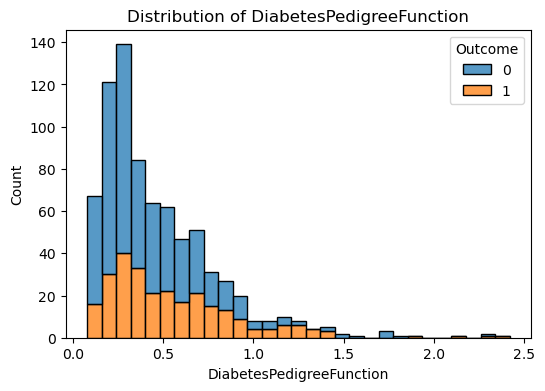

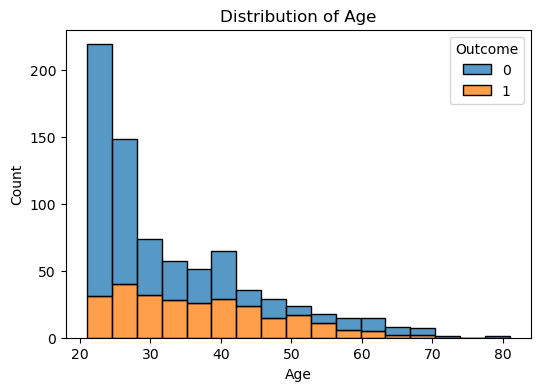

In [10]:
# Histograms
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=data, x=col, hue='Outcome', multiple='stack')
    plt.title(f'Distribution of {col}')
    plt.show()

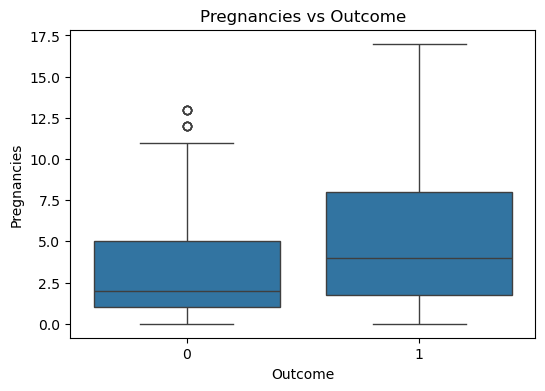

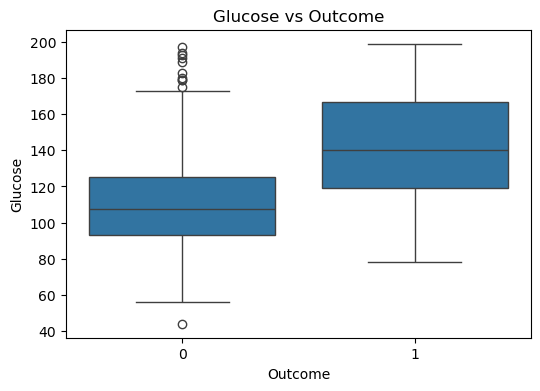

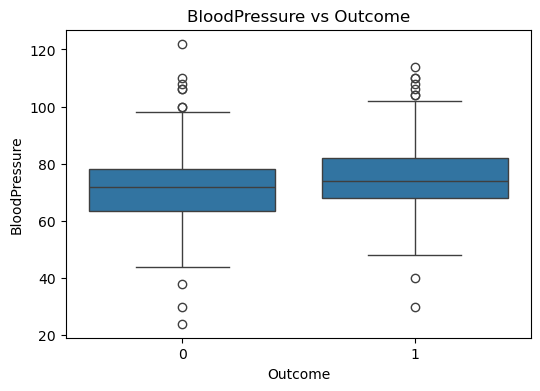

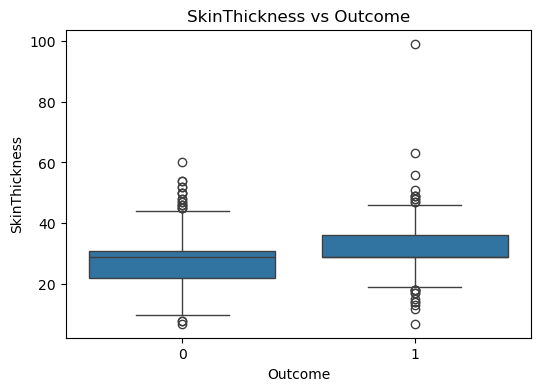

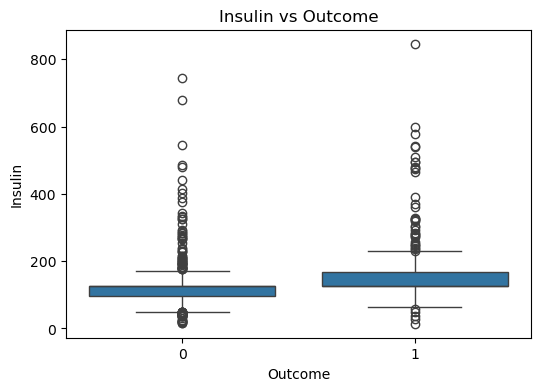

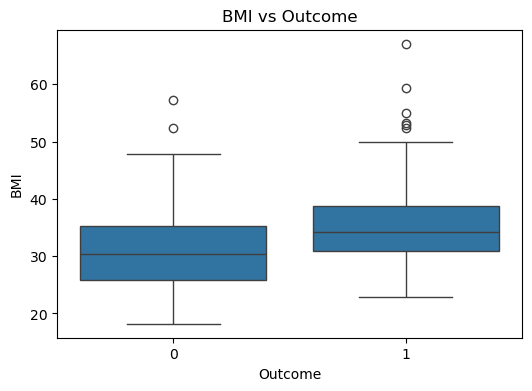

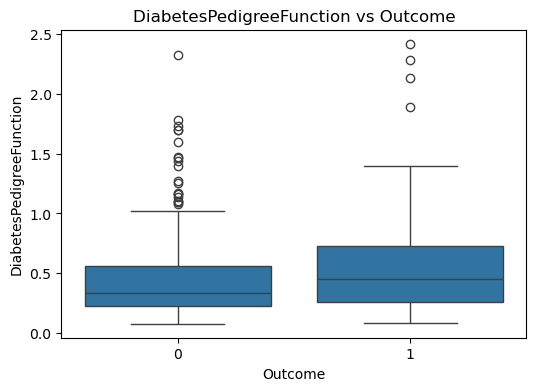

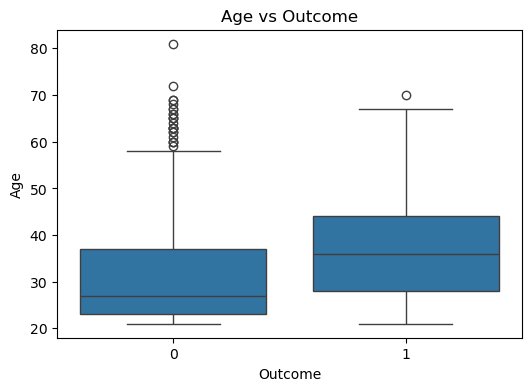

In [11]:
# Box plots
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=data)
    plt.title(f'{col} vs Outcome')
    plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [13]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 0.753
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154


Random Forest:
Accuracy: 0.734
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


SVM:
Accuracy: 0.747
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        99
           1       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71   

/home/ichigo/.local/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:47:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
Accuracy: 0.714
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [15]:
#Here choosing Random forest cause its reaches high density of data
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

In [16]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_scaled, y_train)
print(f"Best params: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Best params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.661


In [17]:
# Save the best model
best_model = grid_search.best_estimator_
with open('diabetes_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)